# TASK - 1

# About the Dataset

Heart failure clinical records:

This dataset contains the medical records of 299 heart failure patients collected over their follow-up period, with each patient profile containing 13 clinical variables. The features include demographic information such as age, gender, and smoking status, as well as medical markers such as blood pressure, platelet count, and serum creatinine levels. The target variable "death_event," indicates if the patient passed away during the follow-up period.

# Problem Statement

Heart failures and myocardial infarctions are the two main symptoms of cardiovascular diseases (CVDs), which are the world's leading cause of death with 17.9 million fatalities annually and 31% of all deaths nationwide.  Heart failure, in which the heart is unable to pump enough blood, is a typical occurrence brought on by CVDs. Early detection and management of high cardiovascular risk factors, such as hypertension, diabetes, hyperlipidemia, or pre-existing illnesses, can be assisted by machine learning models. Machine learning model might be able to detect important medical traits and forecast a patient's survival.

# Goal of the Dataset

The goal of the presented dataset is to evaluate and understand the clinical records of 299 individuals who developed heart failure over their follow-up period.  The major goal is to use this dataset for predictive modeling, where machine learning algorithm namely Random Forest Classifier is used to predict the death outcome where the patient is dying during the follow-up period based on the given attributes.

# Objective

The objective of this project is to use Random Forest Classifier as the Supervised Machine Learning Algorithm to create a model for predicting mortality caused by Heart Failure. 

In [1]:
#Importing the packages
import numpy as np
import pandas as pd

In [2]:
#loading the data
df  = pd.read_csv("C://Users//user//Downloads//heart+failure+clinical+records//heart_failure_clinical_records_dataset.csv")

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Preprocessing

In [3]:
# Printing the dimensions & datatypes of the dataset
print("Here's the dimensions of our data frame:\n", 
     df.shape)
print("Here's the data types of our columns:\n",
     df.dtypes)

Here's the dimensions of our data frame:
 (299, 13)
Here's the data types of our columns:
 age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [4]:
#Presenting the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#Presenting the standard descriptive statistics for each feature
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
#Identification of Missing Values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We can see that there are no missing values in the Dataset.

In [7]:
#Exploring target variable
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Here, since nothing is mentioned we assume that 1 stands for the number of patients who did not survive after the follow-up while 0 represents the number of patients who survived after the follow up period.

In [8]:
#Identifying the names of the columns
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Feature Scaling without Data Pipelining

In [9]:
#Defining the columns which needs to be scaled
num_cols=['age','creatinine_phosphokinase','ejection_fraction','platelets',
       'serum_creatinine', 'serum_sodium','time']

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df[num_cols] = ss.fit_transform(df[num_cols])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


# Random Forest Classifier using Data Pipelining

In this Project, we are using the Random Forest Classifier as the Supervised Machine Learning Algorithm to train the model. To train the model using this ML technique we are also using Data Pipelining.

In [11]:
#Importing the neccessary packages from different libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [12]:
# Defining features and target variable

y=df['DEATH_EVENT']
x=df[['creatinine_phosphokinase','ejection_fraction', 'high_blood_pressure','serum_creatinine', 'serum_sodium','smoking', 'time']]

In [13]:
#Dividing the Dataset into training and testing

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #70% training part

In [14]:
# Creating a pipeline
pipe1 = Pipeline([
    ('scaler', StandardScaler()),   # Feature Scaling
    ('classifier', RandomForestClassifier(n_estimators=100))  # Random Forest Classifier
])

# Training the model
pipe1.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

Since the Data is already encoded we do not need to perform encoding, and thus only feature scaling is done using the pipeline while using the pipeline for Random Forest Classifier. 

In [15]:
# Making predictions
y_pred = pipe1.predict(X_test)

In [16]:
# Making prediction on test data
pipe1.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [17]:
# The actual y_test
y_test

200    0
183    1
146    0
223    0
120    0
      ..
39     1
34     1
118    0
162    0
165    1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [18]:
# Using metrics module for accuracy calculation
metrics.confusion_matrix(y_test, y_pred)

array([[54,  7],
       [13, 16]], dtype=int64)

# Observations

The confusion matrix has four entries: True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN).

True Positive and True Negative means that the model correctly predicted that 16 patients survived after the follow up period, while 54 patients did not survive.

False Positive and False Negative indicates that the model incorrectly predicted that 7 patients survived (when they did not), while 13 patients did not survive (when they did).

In [19]:
# Model evaluation, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778
Precision: 0.6956521739130435
Recall: 0.5517241379310345
F1 Score: 0.6153846153846154
              precision    recall  f1-score   support

           0       0.81      0.89      0.84        61
           1       0.70      0.55      0.62        29

    accuracy                           0.78        90
   macro avg       0.75      0.72      0.73        90
weighted avg       0.77      0.78      0.77        90



# Observations

The output provided includes numerous key class metrics that help in evaluating the performance of the model being trained: 

Accuracy measures how closely all the instances are predicted to their original instances which in this case is 77.78%.

Precision is the measure of how closely the measurements agree with one another, it indicates how many of the events that are expected to happen actually do. It is around 69.57%.

Recall (Sensitivity) demonstrates the number of positive instances that have been accurately predicted which is around 55.17%.

F1 score is the weighted average of precision which is used to evaluate the model's accuracy. It takes into account both precision & recall, which is in this case approximately 61.54%.

The macro and weighted averages are also provided which gives us an understanding of the entire performance.

# Feature Importance

In [20]:
# Feature Importance
feature_imp = pd.Series(pipe1.named_steps['classifier'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

time                        0.402493
ejection_fraction           0.181298
serum_creatinine            0.172722
creatinine_phosphokinase    0.116113
serum_sodium                0.095813
high_blood_pressure         0.016412
smoking                     0.015150
dtype: float64

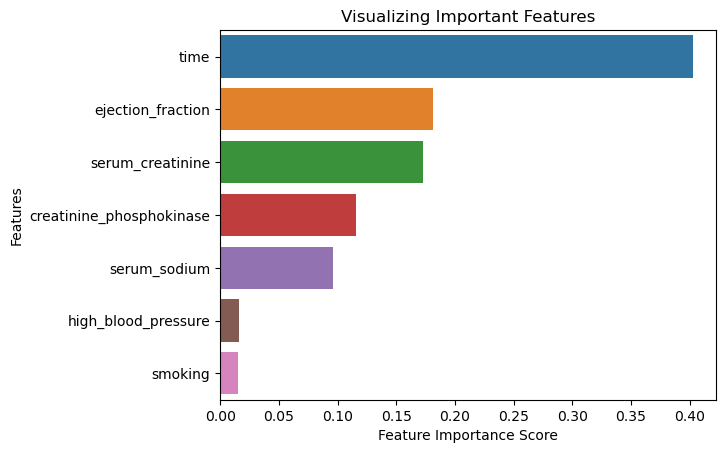

In [21]:
# Visualizing feature importance results
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Observations

From the array, we can see that the most important feature is time which represents the follow up period in days, indicating that changes in time have a considerable impact on forecasting the event of death.The ejection fraction, which indicates that a significant portion of blood leaving the heart with each contraction is a crucial component in the model's predictions, as it is seen to be the second most significant aspect.
Among the factors taken into consideration, smoking has the lowest significance, suggesting that it has the least predictive power for the target variable in this model, while high blood pressure is the second least significant feature used while predicting the death event.
The same can be seen from the visualization of feature importance as well where time is the most important feature while smoking is of the least amount of importance during death prediction.

In [22]:
# Display pipeline as diagram

from sklearn import set_config
set_config(display='diagram')
pipe1

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

# Decision Trees Visualization

In [23]:
# Accessing the first decision tree in the Random Forest
first_tree = pipe1.named_steps['classifier'].estimators_[0]

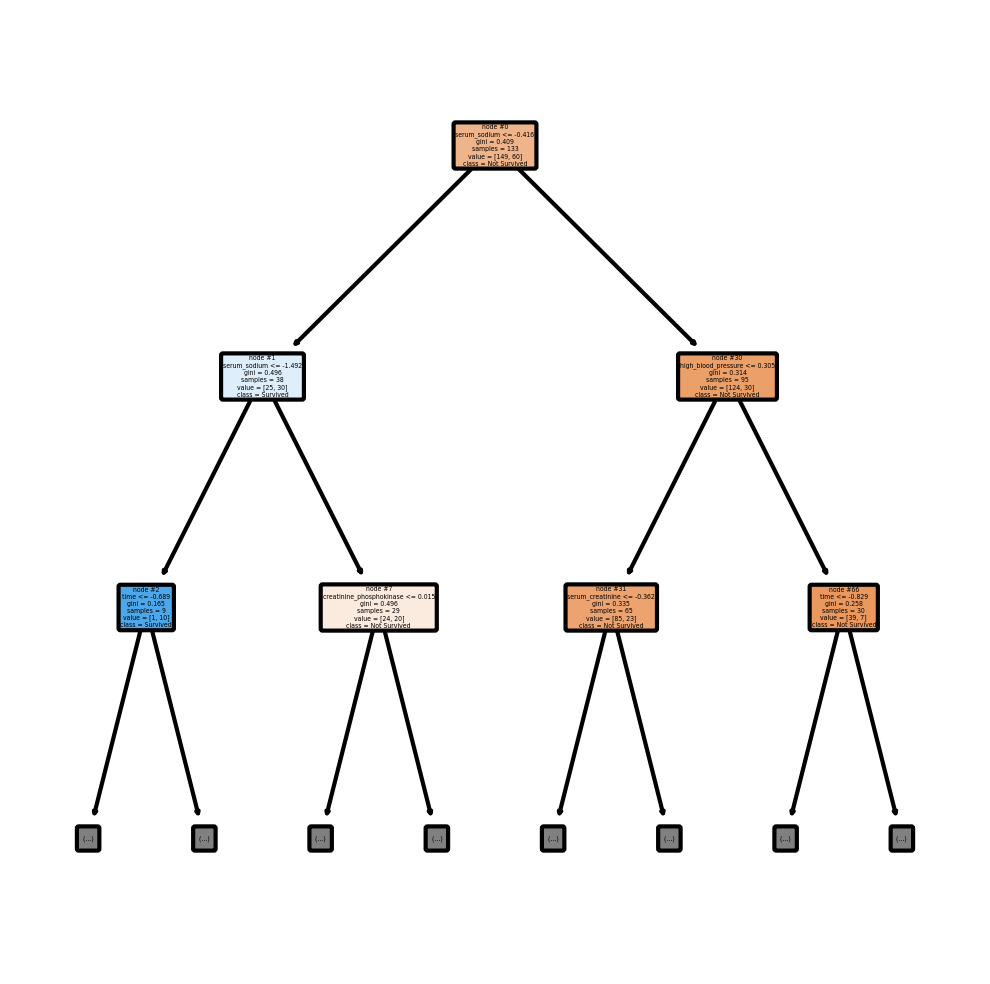

In [24]:
# Visualizing the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(first_tree, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
               feature_names=['creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure',
                              'serum_creatinine', 'serum_sodium', 'smoking', 'time'],
               class_names=["Not Survived", "Survived"])
plt.show()

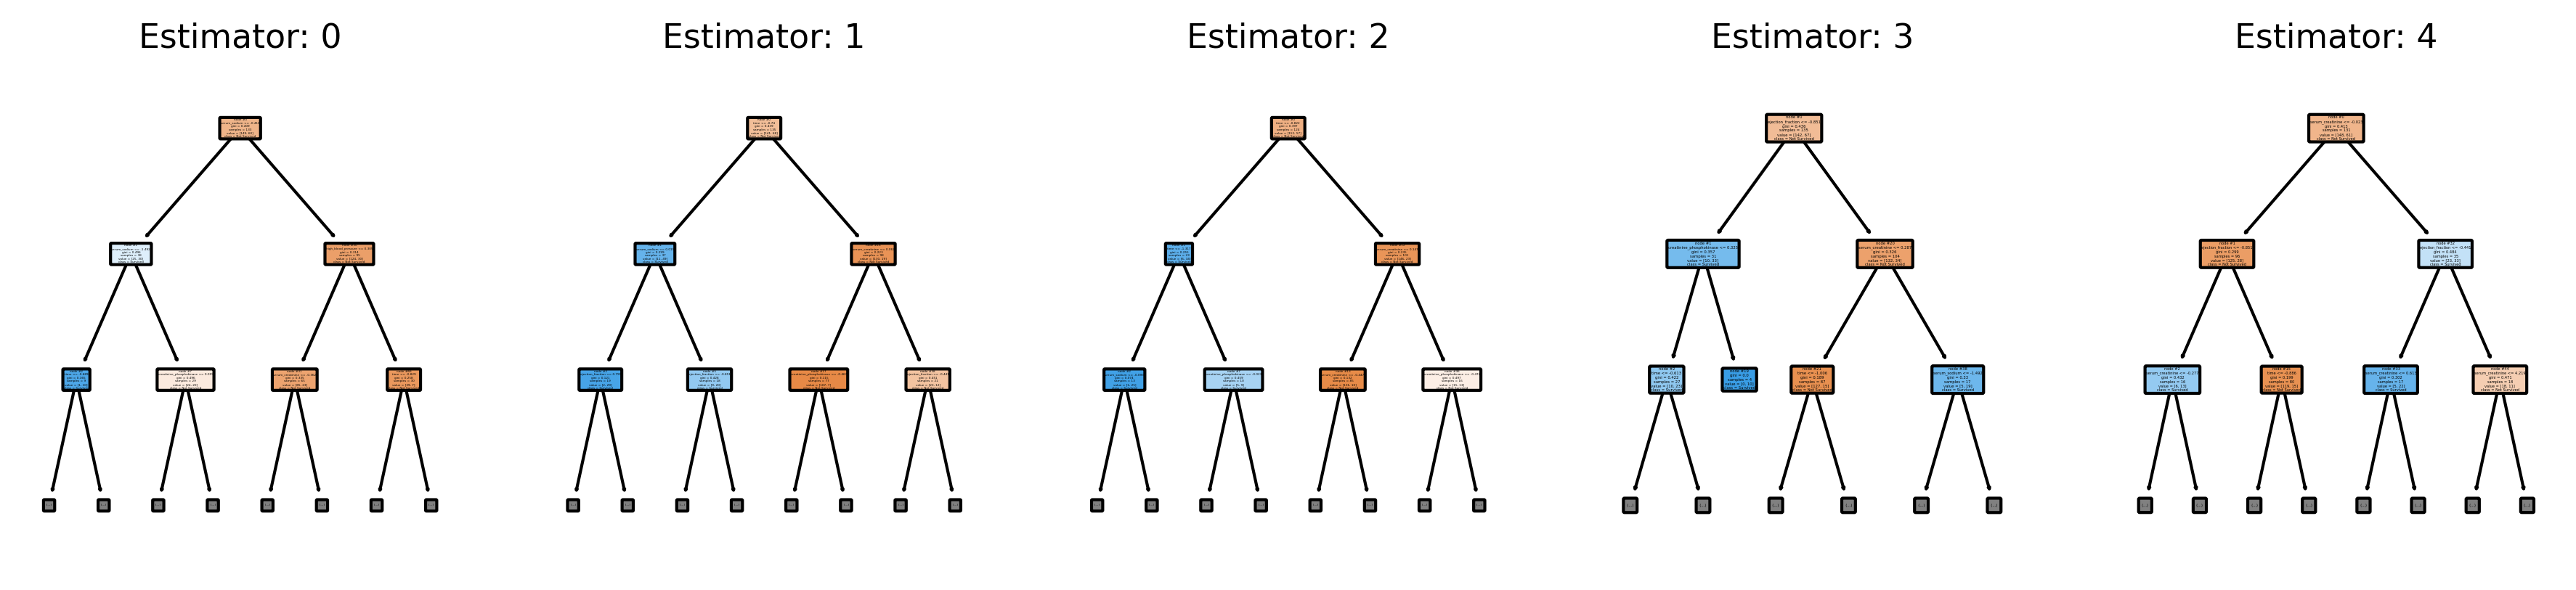

In [25]:
# Plotting multiple decision trees from the Random Forest
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), dpi=300)

# Accessing the first 5 decision trees in the Random Forest
for index in range(5):
    tree_to_plot = pipe1.named_steps['classifier'].estimators_[index]
    
    # Plotting the decision tree
    tree.plot_tree(tree_to_plot, max_depth=2, rounded=True, filled=True, impurity=True, node_ids=True,
                   feature_names=['creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure',
                                  'serum_creatinine', 'serum_sodium', 'smoking', 'time'],
                   class_names=["Not Survived", "Survived"],
                   ax=axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize=11)

plt.show()


Here, we are plotting a single decision tree from the random forest as well as multiple decision trees from the random forest model which is build and trained.

# Using a sample new data point to test the model

In [26]:
# Sample a new data point
new_data_point = pd.DataFrame({
    'creatinine_phosphokinase': [150],
    'ejection_fraction': [40],
    'high_blood_pressure': [1],  # Assuming 1 for True, 0 for False
    'serum_creatinine': [1.0],
    'serum_sodium': [140],
    'smoking': [0],  # Assuming 1 for True, 0 for False
    'time': [100]
})

In [27]:
# Use the pipeline for prediction
new_data_pred = pipe1.predict(new_data_point)

# Display the prediction
print("Predicted Death Event:", new_data_pred[0])

Predicted Death Event: 0


# Observation

The objective of using a samle new data point is to forecast whether a patient will die (1) or survive(0) after a follow-up period. The output 0 suggests that the model predicts that the brand new records factor corresponds to a patient who did survive after the follow up period. If the predicted death event for a new data point is 0, it suggests that the model is predicting that the patient will live to tell the tale.

# Conclusion

In conclusion, machine learning model used in this project is used to enhance the early detection and management of cardiovascular diseases, mainly focusing on heart related disorder like heart failure as concerning outcome. Through the evaluation of key metrics such as accuracy (77.78%), precision (69.57%), recall (55.17%), and F1 score (61.54%), the model exhibited a significant ability to predict patient outcomes after a follow-up period. Time and ejection fraction are important factor identified by feature importance analysis for predicting events, in the same analysis smoking & high blood pressure showed lesser importance. This model is used in predicting patient survival (0) or a death event (1) based on these factors which provides significant insights for healthcare professionals to make informed decisions and implement timely interventions. This project focuses mainly on the capabilities of machine learning in improving cardiovascular health outcomes through early detection and informed management strategies.